In [3]:
# importing the necessary libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import print_function, division
# setting a random seed
np.random.seed(10)

In [7]:
# generating a normal distribution for male heights
male_mu=178
male_sd=7.7
male_dist=stats.norm(male_mu,male_sd)
male_dist

In [6]:
# generating normal distribution for female heights
female_mu=163
female_sd=7.3
female_dist=stats.norm(female_mu,female_sd)
female_dist

In [9]:
# finding mean difference 
mean_diff=male_mu-female_mu
mean_diff

15

In [10]:
#finding pdfs
def evaluate_pdf(rv,x=4):
    mean=rv.mean()
    std=rv.std()
    xs=np.linspace(mean-x*std,mean+x*std,100)
    ys=rv.pdf(xs)
    return xs,ys

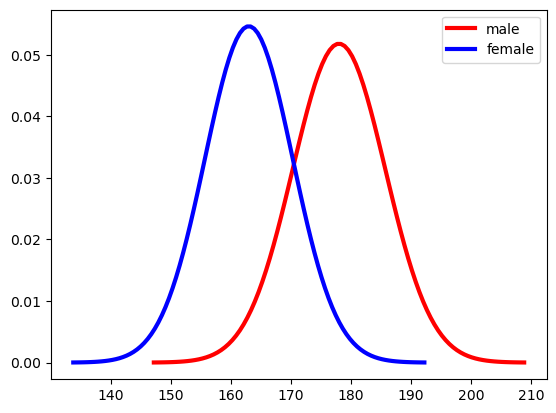

In [13]:
# ploting the pdfs
#for male height
xs,ys=evaluate_pdf(male_dist)
plt.plot(xs,ys,lw=3,color="r",label="male")
#for female height
xs,ys=evaluate_pdf(female_dist)
plt.plot(xs,ys,lw=3,color="b",label="female")
plt.legend();

In [15]:
# generating random values using male dist
male_sample=male_dist.rvs(100)
male_mean=np.mean(male_sample)
male_std=np.std(male_sample)
print(male_mean,male_std)

178.53281831446301 7.587078577392374


In [16]:
# generating random saple using female dist
female_sample=female_dist.rvs(1000)
female_mean,female_std=female_sample.mean(),female_sample.std()
female_mean,female_std

(162.88084792328917, 6.9281282391972185)

In [18]:
# for simple effect size we get the difference in means
diff_means=male_mean-female_mean
diff_means

15.651970391173847

the problem with this method is it doesn't factor in the units of measurements used hence cannot be reproducible and also we can't know how big of a difference it is

In [19]:
#using the relative difference
relative_diff1=(diff_means/male_mean)*100
relative_diff1

8.766998997128292

In [20]:
relative_diff2=(diff_means/female_mean)*100
relative_diff2

9.609460283842177

it is relative hence the results are subjective


# overlap threshhold


In [21]:
simple_thresh=(male_mean+female_mean)/2
simple_thresh

170.7068331188761

# probability of superiority

In [ ]:
#prob of superiority of male sample
sum(x>y for x,y in zip(male_sample,female_sample))/len(male_sample)

0.96

In [26]:
#prob of superiority of female heights
sum(x>y for x,y in zip(female_sample,male_sample))/len(female_sample)

0.004

## standardized effect size

In [29]:
def cohen_d(group1,group2):
    n1=1000
    n2=1000
    group1=group1.rvs(n1)
    group2=group2.rvs(n2)
    var1,var2=group1.var(),group2.var()
    diff_mean=group1.mean()-group2.mean()
    pooled_var=(n1*var1+n2*var2)/(n1+n2)
    d=diff_mean/np.sqrt(pooled_var)
    return d


In [30]:
cohen_d(male_dist,female_dist)

1.9751749021501672

In [31]:
# plotting the cohen,s d
def plot_pdf(cohen_d=2):
    group1=stats.norm(0,1)
    group2=stats.norm(cohen_d,1)
    xs,ys=evaluate_pdf(group1)
    plt.plot(xs,ys,color="r")
    xs,ys=evaluate_pdf(group2)
    plt.plot(xs,ys,color="b")

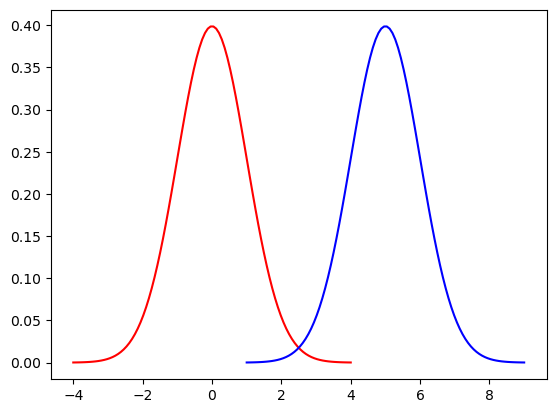

In [35]:
plot_pdf(5)